In [12]:
import matplotlib.pyplot as plt;
import numpy as np;

In [13]:
data = np.loadtxt("../plot_finer/test.txt", delimiter=',', dtype=np.complex64);

In [14]:
data_subtracted=data[:, 4:]
np.shape(data_subtracted)

(3201, 769)

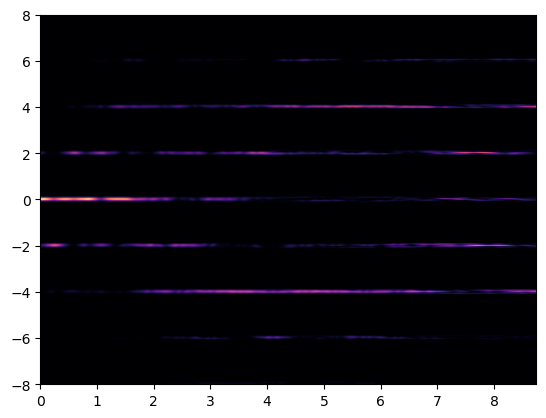

In [15]:
plt.imshow(np.square(np.abs(data_subtracted)).T, cmap = "magma", extent = [ data[0,2],data[-1,2], -16/2,16/2 ,],origin="lower",aspect = "auto")
plt.grid(False)

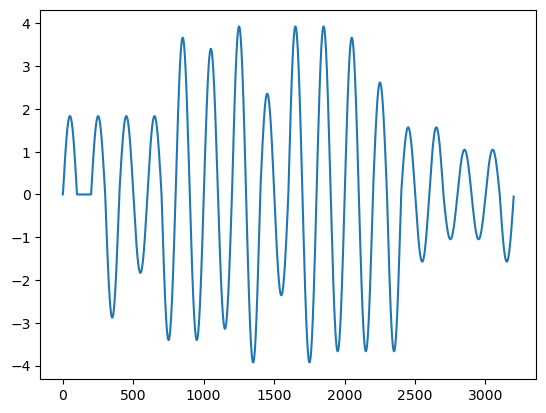

In [16]:
plt.plot(data[:,3])

In [17]:
import scipy as scp;

## FFT STYLE 1

In [ ]:
myfft = np.array([scp.fft.fft( data_subtracted[n,:]) for n in range(len(data_subtracted))])

In [ ]:
x_val=np.square(np.abs(myfft))

In [ ]:
plt.imshow(x_val.T, cmap="magma", aspect="auto")

In [ ]:
halfway = int((len(x_val[:,0])-1)/2)
halfway

In [ ]:
x_reshaped = np.concatenate( (x_val[:,halfway:], x_val[:,0:halfway+1]), axis=1 )

In [ ]:
plt.imshow(x_val[:, halfway:-1], cmap="magma", aspect="auto")

In [ ]:
plt.imshow(x_val[:,0:halfway+1], aspect = "auto")

## FFT STYLE 2

In [18]:
halfway = int((len(data_subtracted[0,:])-1)/2)
halfway
p_reshaped = np.concatenate( (data_subtracted[:,halfway:], data_subtracted[:,0:halfway+1]), axis=1 )

In [20]:
myfft = np.array([scp.fft.fft(p_reshaped[n]) for n in range(len(data_subtracted))])

In [21]:
myfft_reshaped=np.concatenate( (myfft[:,halfway:], myfft[:,0:halfway+1]), axis=1 )

## WARNING: Why aren't these normalized

In [22]:
temp = np.square(np.abs(myfft_reshaped));
myfft_reshaped_rescaled = np.array ( [ temp[m,:]/np.sum(temp[m,:])    for m in range(len(myfft_reshaped)) ] )

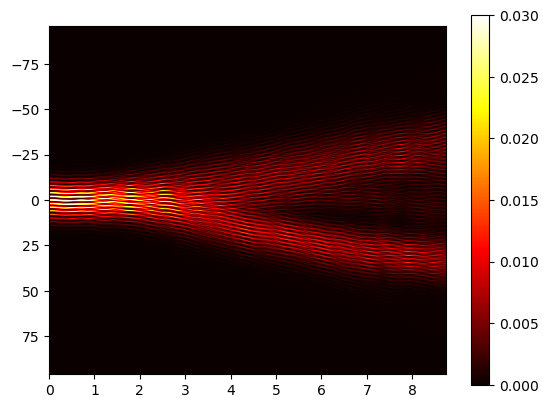

In [23]:
plt.imshow(myfft_reshaped_rescaled.T, cmap="hot",aspect="0.04", vmax=0.03, extent=[data[0,2],data[-1,2],96, -96 ])
plt.colorbar()

In [24]:
np.sum(np.square(np.abs(myfft_reshaped))[0,:])

62.14093